In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import networkx as nx

# Dataset Description
The dataset used is the p2p file sharing network from 2002. The link for the same is: https://snap.stanford.edu/data/p2p-Gnutella08.html
Nodes represent hosts in the Gnutella network topology and edges represent connections between the Gnutella hosts.
There are a total of 6301 nodes and 20777 edges in the graph.



In [2]:
g = nx.read_edgelist("p2p-Gnutella08.txt",create_using=nx.DiGraph(), nodetype = int)

print(nx.info(g))
g.number_of_nodes()

DiGraph with 6301 nodes and 20777 edges


6301

In [3]:
#function to create an undirected and unweighted adjacency matrix from list of tuples of edges
def create_unweighted_undirected_adj_matrix(edges, num_nodes):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)]
    for edge in edges:
        adj_matrix[edge[0]][edge[1]] = 1
        adj_matrix[edge[1]][edge[0]] = 1
    return adj_matrix

#function to create a undirected and weighted adjacency matrix from list of tuples of edges
def create_weighted_undirected_adj_matrix(edges, num_nodes):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)]
    for edge in edges:
        adj_matrix[edge[0]][edge[1]] = random.randint(1,10)
        adj_matrix[edge[1]][edge[0]] = adj_matrix[edge[0]][edge[1]]
    return adj_matrix

#function to create a directed and unweighted adjacency matrix from list of tuples of edges
def create_unweighted_directed_adj_matrix(edges, num_nodes):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)]
    for edge in edges:
        adj_matrix[edge[0]][edge[1]] = 1
    return adj_matrix

#function to create a directed and weighted adjacency matrix from list of tuples of edges
def create_weighted_directed_adj_matrix(edges, num_nodes):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)]
    for edge in edges:
        adj_matrix[edge[0]][edge[1]] = random.randint(1,10)
    return adj_matrix

def create_edge_list():
    dasdas = 0

In [4]:
def num_nodes(adj_matrix):
    return adj_matrix.shape[0]

def num_edges(adj_matrix):
    return np.sum(adj_matrix)

In [5]:
adj = create_unweighted_directed_adj_matrix(g.edges(), g.number_of_nodes())

In [6]:
def num_nodes(adj_matrix):
    print("Number of Nodes", len(adj_matrix))
    return len(adj_matrix)

def num_edges(adj_matrix):
    print("Number of Edges", np.sum(adj_matrix))
    return np.sum(adj_matrix)

#function to compute degree of undirected graph from adjacency matrix
def compute_degree_undirected(adjacency_matrix, num_nodes):
    degree = [0 for i in range(num_nodes)]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] == 1:
                degree[i] += 1
    return degree

#function to compute in and out degree of directed graph from adjacency matrix
def compute_degree_directed(adjacency_matrix, num_nodes):
    degree = [[0,0] for i in range(num_nodes)] #[in degree, out degree]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] == 1:
                degree[i][1] += 1
                degree[j][0] += 1
    return degree

def avg_in_degree(adj_matrix, num_nodes):
    degrees = compute_degree_directed(adj_matrix, num_nodes)
    print("Average In Degree", sum(map(lambda x: x[0], degrees))/len(degrees))

def avg_out_degree(adj_matrix, num_nodes):
    degrees = compute_degree_directed(adj_matrix, num_nodes)
    print("Average Out Degree", sum(map(lambda x: x[1], degrees))/len(degrees))

def node_max_in_degree(adj_matrix, num_nodes):
    degrees = list(map(lambda x: x[0],compute_degree_directed(adj_matrix, num_nodes)))
    print("Node with maximum In Degree", degrees.index(max(degrees)))

def node_max_out_degree(adj_matrix, num_nodes):
    degrees = list(map(lambda x: x[1],compute_degree_directed(adj_matrix, num_nodes)))
    print("Node with maximum Out Degree", degrees.index(max(degrees)))

def calculate_density(adj_matrix, num_nodes):
    print("Density of the Network",(num_nodes*(num_nodes-1))/num_edges(adj_matrix))

#function to calculate degree distribution of a graph from its adjacency matrix
def degree_distribution(adj_matrix, num_nodes):
    degree_dist_in = []
    degree_dist_out = []
    degrees = compute_degree_directed(adj_matrix, num_nodes)
    degrees_in = list(map(lambda x: x[0],degrees))
    degrees_out = list(map(lambda x: x[1],degrees))
    for i in range(max(degrees_in)+1):
        degree_dist_in.append(degrees_in.count(i)/num_nodes)
    for i in range(max(degrees_out)+1):
        degree_dist_out.append(degrees_out.count(i)/num_nodes)
    return degree_dist_in, degree_dist_out

def plot_degree_dist(adj_matrix, num_nodes):
    d_in, d_out = degree_distribution(adj_matrix, num_nodes)
    plt.plot(range(len(d_in)), d_in, label='in_degree')
    plt.plot(range(len(d_out)), d_out, label='out_degree')
    plt.legend(['in_degree List', 'out_degree List'], loc='best')
    plt.show()

def plotDegreeDist(degLst, label):
    allDegs = list(set(degLst))
    allDegs.sort()
    y = [0]*len(allDegs)
    for i in range(len(allDegs)):
        y[i] = (degLst.count(allDegs[i]))/len(degLst)
    plt.bar(allDegs, y)
    plt.plot(allDegs, y)
    plt.title(label)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.show()

def clustering_coefficient(adj_matrix, num_nodes):
    clustering_coeff = []
    for i in range(num_nodes):
        neighbors = []
        neighbours_neighbours = 0
        for j in range(num_nodes):
            if adj_matrix[i][j] == 1:
                neighbors.append(j)
        for j in neighbors:
            for k in neighbors:
                if adj_matrix[j][k] == 1 and j != k:
                    neighbours_neighbours += 1
        if len(neighbors) > 1:
            clustering_coeff.append(neighbours_neighbours/(len(neighbors)*(len(neighbors)-1)))
        else:
            clustering_coeff.append(0)
    return clustering_coeff

def plot_clustering_coef(adj_matrix, num_nodes):
    local_clustering = clustering_coefficient(adj_matrix, num_nodes)
    print(max(local_clustering))
    local_clustering.sort()
    print(local_clustering)
    n, bins, patches = plt.hist(local_clustering, bins=50)
    plt.show()


In [7]:
num_nodes(adj),num_edges(adj)

Number of Nodes 6301
Number of Edges 20777


(6301, 20777)

In [8]:
print(avg_in_degree(adj, len(adj)), avg_out_degree(adj, len(adj)))

Average In Degree 3.2974131090303125
Average Out Degree 3.2974131090303125
None None


In [9]:
node_max_in_degree(adj, len(adj)), node_max_out_degree(adj, len(adj)) 

Node with maximum In Degree 266
Node with maximum Out Degree 5831


(None, None)

In [10]:
calculate_density(adj, len(adj))

Number of Edges 20777
Density of the Network 1910.5886316600086


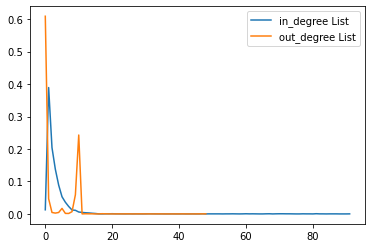

In [11]:
plot_degree_dist(adj, len(adj))

0.16666666666666666
[0.0, 0, 0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0, 0, 0.0

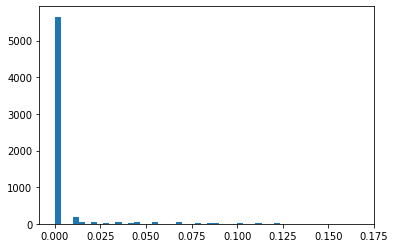

In [12]:
plot_clustering_coef(adj, len(adj))

In [23]:
pr = nx.pagerank(g, alpha=0.4)
pr

{0: 0.00013287025158751435,
 1: 0.00013818862218710772,
 2: 0.00016931803207316545,
 3: 0.0006708239904678095,
 4: 0.000641777786912985,
 5: 0.0007313470837743953,
 6: 0.00013818862218710772,
 7: 0.000584925280147532,
 8: 0.0006376951777880474,
 9: 0.0005268066397022923,
 10: 0.0001988677834989589,
 703: 0.00018361493099551356,
 826: 0.00017801010519597453,
 1097: 0.00019876677884846553,
 1287: 0.00019475534894207946,
 1591: 0.00024774239292161876,
 1895: 0.0001594188562298723,
 1896: 0.00019002978927387361,
 1897: 0.0001594188562298723,
 1898: 0.00017082693103065918,
 1899: 0.0001656821244753963,
 144: 0.0006305080478234715,
 258: 0.00016539583671397841,
 491: 0.00022128232518642005,
 1021: 0.0002232783220446259,
 1418: 0.00016461835382669462,
 1669: 0.00018411510622855543,
 1900: 0.0002101654005938763,
 1901: 0.00018637028588377162,
 1902: 0.00015808860811599958,
 1903: 0.00028298188146355175,
 121: 0.0005474790324380823,
 127: 0.00082729281406107,
 128: 0.0005441100253775179,
 179: 

In [24]:
h, a = nx.hits(g, normalized=True)

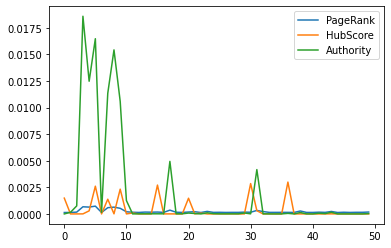

In [28]:
pr = dict(sorted(pr.items()))
h = dict(sorted(h.items()))
a = dict(sorted(a.items()))
idx = [i for i in pr][:50]
prvals = [pr[i] for i in pr][:50]
hvals = [h[i] for i in h][:50]
avals = [a[i] for i in a][:50]
plt.plot(idx, prvals)
plt.plot(idx, hvals)
plt.plot(idx, avals)
plt.legend(["PageRank", "HubScore", "Authority"], loc="best")
plt.show()

In [32]:
in_degree_sorted = sorted(g.in_degree, key=lambda x: x[1], reverse=True)
out_degree_sorted = sorted(g.out_degree, key=lambda x: x[1], reverse=True)
in_degree_sorted[:5], out_degree_sorted[:5]

([(266, 91), (123, 87), (367, 86), (127, 85), (424, 83)],
 [(5831, 48), (1675, 47), (5202, 46), (6139, 41), (1890, 34)])

In [33]:
list(sorted(pr.items(), key=lambda kv: kv[1], reverse=True))[:5], list(sorted(h.items(), key=lambda kv: kv[1], reverse=True))[:5]

([(367, 0.0008923344849923214),
  (249, 0.0008751967265647223),
  (266, 0.0008338758977489945),
  (127, 0.00082729281406107),
  (123, 0.0008088053247174937)],
 [(3459, 0.00303239596876762),
  (366, 0.003004853728692919),
  (36, 0.002992944003649026),
  (2374, 0.0029659158718905536),
  (3693, 0.002954220175634605)])

# Inference:

The ranking of nodes by PageRank and Hub score are different. A theoretical difference between the two algrithms is that PageRank takes in-degree into account so, the pagerank for the nodes having max in degree is highest. Similarily hub takes into account the out degree, thus nodes having max out degree have high hub score. This can be seen in the above two cells. Also HITS algorithm is query dependent but page rank is not.